# Big Data for Health (CSE6250) 

Goal: Using Logistic Regression Machine model to predict sepsis onset using MIMIC III Data

Author: Ankur Malhotra

## Logistic Regression - Model Evaluation

Train/Test data size: 4885/543
Best CV score: 0.7181428443633926
Best parameters: {'clf__C': 100.0, 'clf__penalty': 'l2'}
______________________________________________
Classifier: LR
Accuracy:  0.8840
AUC:  0.7849
AUPRC:  0.3323
Precision:  0.5000
Recall:  0.0794
F1-score:  0.1370
______________________________________________



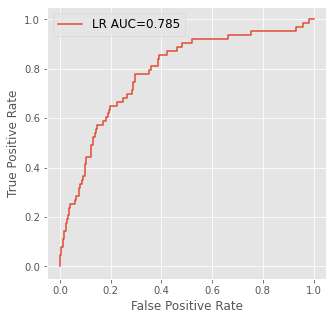

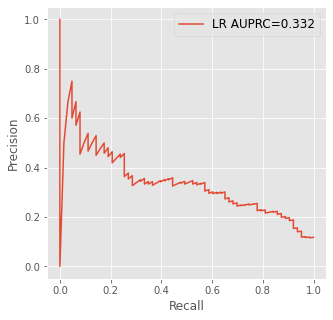

In [1]:
from sklearn.linear_model import LogisticRegression
from Python.model_data import model_data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from Python.utils import classification_metrics, plot_roc, plot_prc
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp

df_train, df_test = model_data(model_type="LR", test_size=.1)
x_train, y_train = df_train.drop(columns=['label', 'icustay_id']), df_train.label
x_test, y_test = df_test.drop(columns=['label', 'icustay_id']), df_test.label

# define pipeline
cachedir = mkdtemp()
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(solver='saga',max_iter=10000, random_state=0))
], memory=cachedir)

# 5-fold grid search cv
grid={"clf__C": np.logspace(-4, 4, 9), "clf__penalty":["l1", "l2"]}
logreg_cv=GridSearchCV(pipe ,grid, cv=5, n_jobs=10, scoring="roc_auc")
logreg_cv.fit(x_train,y_train)

print("Best CV score:", logreg_cv.best_score_)
print("Best parameters:", logreg_cv.best_params_)

# evaluate on test data
y_pred = logreg_cv.best_estimator_.predict_proba(x_test)[:,1]
classification_metrics("LR", y_test, y_pred)
plot_roc(figname="output/LR_roc.png", LR="output/LR_roc.csv")
plot_prc(figname="output/LR_prc.png", LR="output/LR_prc.csv")